In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models
import flows

In [2]:
data = sio.loadmat("data_1.mat")
x = data["x"]
A = data["A"]
w = data["w"]
k = data["k"]
u = data["f"]

In [3]:
N = 1000
x_train = x.T
u_train = u[:N, :].T

In [4]:
x_train.shape

(40, 1)

In [5]:
mhnn = models.MHNN(num_tasks=N, dim=50, name="mhnn")

In [6]:
# loss = mhnn.train(x_train, u_train, niter=50000)
mhnn.restore()

In [7]:
permutation = list(np.arange(26, 51, 1)) + list(np.arange(0, 26, 1))

nf = flows.MAF(
    dim=51,
    permutation=permutation,
    hidden_layers=[100, 100],
    num_bijectors=10,
    activation=tf.nn.relu,
    name="maf",
)
data = mhnn.heads.numpy().T

In [8]:
# loss = nf.train_batch(tf.constant(data, tf.float32), nepoch=1000)
nf.restore()

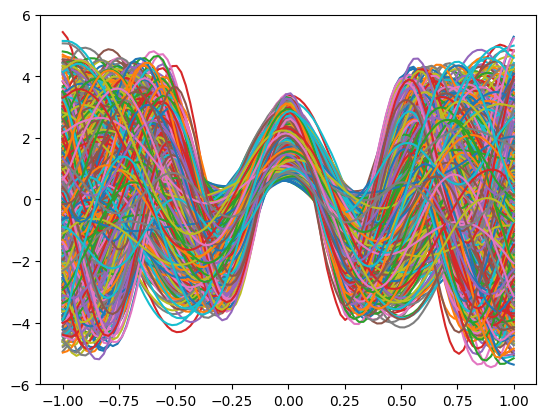

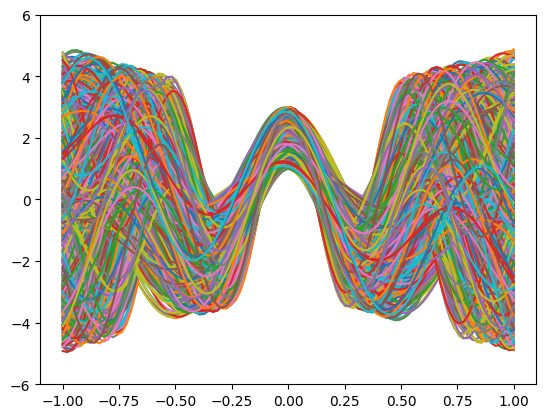

In [12]:
heads = nf.sample(1000)
x_test = tf.constant(np.linspace(-1, 1, 100).reshape([-1, 1]), tf.float32)
# y_test = tf.constant(y_train, tf.float32)

plt.figure()
out = mhnn.call(x_test, tf.transpose(heads))
for i in range(1000):
    plt.plot(x_test, out[:, i])
plt.ylim([-6, 6])

plt.figure()
for i in range(1000):
    plt.plot(x_test, A[i]*np.cos(w[i]*x_test) + 2*k[i]*x_test)
plt.ylim([-6, 6])
plt.show()

In [10]:
# heads = nf.sample(1000)
# x_test = tf.constant(np.linspace(-1, 1, 100).reshape([-1, 1]), tf.float32)
# # y_test = tf.constant(y_train, tf.float32)

# plt.figure()
# out = mhnn.call(x_test, tf.transpose(heads))
# for i in range(1000):
#     plt.plot(x_test, out[:, i])
# plt.ylim([-6, 6])

# plt.figure()
# for i in range(1000):
#     plt.plot(x_test, A[i]*np.cos(w[i]*x_test) + 2*k[i]*x_test)
# plt.ylim([-6, 6])
# plt.show()

In [11]:
x_test = x_test.numpy()
learned = out.numpy()
trained = A[:N] * np.cos(w[:N]*x_test.T) + 2 * k[:N]*x_test.T

In [20]:
sio.savemat(
    "./plot/samples.mat",
    {
        "x_test": x_test,
        "learned": learned,
        "trained": trained.T,
    }
)